## Seguimentação de Cliente Baseado em Comportamento

### Descrição do conjunto de dados:

#### Objetivo: Agrupar clientes em segmentos distintos com base em seus comportamentos de compra.

O conjunto de dados representa dados transacionais de varejo. Ele contém informações sobre clientes, suas compras, produtos e detalhes da transação. Os dados incluem vários atributos, como 
- ID do cliente, 
- nome, 
- e-mail, 
- telefone, 
- endereço, 
- cidade, 
- estado, 
- CEP, 
- país, 
- idade, 
- sexo, 
- renda, 
- segmento de cliente, 
- data da última compra, 
- total de compras, 
- valor gasto, 
- categoria do produto, 
- marca do produto, 
- tipo de produto, 
- feedback, 
- método de envio, 
- método de pagamento,
- status do pedido.

##### Importação de Pacotes

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

#### Importação e pré-visualização dos dados, com arquivo CSV

In [3]:
#Importação e pré-visualização dos dados, com arquivo CSV
base = pd.read_csv("C:/Users/menez/OneDrive - Faculdade Impacta Tecnologia/IMPACTA 2024/ANO LETIVO 2024/MATÉRIAS/REAL DATA - DRIVEN BUSINESS PROJECT (HANDS-ON)/ecommerce/archive/new_retail_data.csv")
print(base.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0      8691788.00     37249.00  Michelle Harrington    Ebony39@gmail.com   
1      2174773.00     69749.00          Kelsey Hill     Mark36@gmail.com   
2      6679610.00     30192.00         Scott Jensen    Shane85@gmail.com   
3      7232460.00     62101.00        Joseph Miller     Mary34@gmail.com   
4      4983775.00     27901.00        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0 1414786801.00            3959 Amanda Burgs    Dortmund           Berlin   
1 6852899987.00           82072 Dawn Centers  Nottingham          England   
2 8362160449.00            4133 Young Canyon     Geelong  New South Wales   
3 2776751724.00  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4 9098267635.00    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country   Age  Gender Income Customer_Segment        Date  \
0 779

#### Tamanho do conjunto de dados

In [4]:
#Tamanho do conjunto de dados
base.shape

(302010, 30)

#### Registros Top 5

In [5]:
#Registros Top 5
base.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment
3,7232460.00,62101.00,Joseph Miller,Mary34@gmail.com,2776751724.00,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.00,Canada,56.00,Male,High,Premium,5/8/2023,2023.00,May,14:55:17,7.00,352.41,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.00,Utility knife
4,4983775.00,27901.00,Debra Coleman,Charles30@gmail.com,9098267635.00,5813 Lori Ports Suite 269,Bristol,England,48704.00,UK,22.00,Male,Low,Premium,1/10/2024,2024.00,January,16:54:07,2.00,124.28,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.00,Chocolate cookies


### Verificação de dados nulos para avaliar exclusão ou subistituição

In [6]:
#Verificação de dados nulos para avaliar exclusão ou subistituição
base.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

### Identificando o tipo do produto

In [7]:
#Identifica o tipo do produto
base.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

##### Convertendo o typo de dados da coluna Data de object para datetime
##### Conferindo o tipo de dado Data após a alteração
##### Excluindo os valores nulos de Data


In [8]:
# Convertendo o typo de dados da coluna Data de object para datetime
base['Date'] = pd.to_datetime(base['Date'])

#Conferindo o tipo de dado Data após a alteração
print(base['Date'].dtype)

# Excluindo os valores nulos de Data
base = base.dropna(subset=['Date'])

datetime64[ns]


### Conferindo se os valores nulos da coluna Data foi excluido

In [9]:
#Conferindo se os valores nulos da coluna Data foi excluido
base.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                381
Email               347
Phone               362
Address             314
City                248
State               279
Zipcode             339
Country             271
Age                 172
Gender              317
Income              290
Customer_Segment    215
Date                  0
Year                350
Month               272
Time                349
Total_Purchases     361
Amount              356
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      296
Order_Status        234
Ratings             184
products              0
dtype: int64

### Periodo da Base de dados

Podemos verificar pelo resultado o periodo em que os dados foram coletados, de 01-03-2023 até 29-02-2024, 1 ano

In [10]:
# Avaliar o período dos dados coletados
inicio = pd.to_datetime(base['Date']).dt.date.min()
fim = pd.to_datetime(base['Date']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2023-03-01 Até: 2024-02-29


### Análisamos a quantidade de valores unicos em cada coluna

In [11]:
# Análisamos a quantidade de valores unicos em cada coluna
valores_unicos = []
for i in base.columns[0:20].tolist():
    print(i, ':', len(base[i].astype(str).value_counts()))
    valores_unicos.append(len(base[i].astype(str).value_counts()))

Transaction_ID : 294118
Customer_ID : 86754
Name : 159258
Email : 52882
Phone : 298939
Address : 298974
City : 131
State : 55
Zipcode : 93960
Country : 6
Age : 54
Gender : 3
Income : 4
Customer_Segment : 4
Date : 366
Year : 3
Month : 13
Time : 83667
Total_Purchases : 11
Amount : 298942


In [12]:
# Visualizando algumas medidas estatisticas
base.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,301318.00,301343.00,301289.00,301312.00,301479.00,301651,301301.00,301290.00,301295.00,301301.00,301467.00
mean,5495772.14,55010.22,5501352644.31,50299.48,35.48,2023-08-30 16:17:07.497339392,2023.17,5.36,255.18,1367.77,3.16
min,1000007.00,10000.00,1000049414.00,501.00,18.00,2023-03-01 00:00:00,2023.00,1.00,10.00,10.00,1.00
25%,3247781.50,32472.50,3255177925.00,25426.00,22.00,2023-05-31 00:00:00,2023.00,3.00,132.92,438.89,2.00
50%,5499516.50,55016.00,5505628649.00,50605.00,32.00,2023-08-31 00:00:00,2023.00,5.00,255.49,1041.23,3.00
75%,7739532.25,77512.00,7749691148.00,75250.25,46.00,2023-11-30 00:00:00,2023.00,8.00,377.67,2030.17,4.00
max,9999995.00,99999.00,9999996122.00,99949.00,70.00,2024-02-29 00:00:00,2024.00,10.00,500.00,4999.63,5.00
std,2595688.89,26005.50,2595923627.04,28972.34,15.02,NaN,0.37,2.87,141.39,1128.95,1.32


### Produto Mais caro e mais barato

In [13]:
#Produto Mais caro e mais barato
print('Maior Valor Transação:', base['Amount'].max())
print('Menor Valor Transação:', base['Amount'].min())

Maior Valor Transação: 499.997911
Menor Valor Transação: 10.00021923


### Maior venda e menor venda

In [14]:
#Maior venda e menor venda
print('Maior Valor Transação:', base['Total_Amount'].max())
print('Menor Valor Transação:', base['Total_Amount'].min())

Maior Valor Transação: 4999.625796
Menor Valor Transação: 10.00374959


### Analisando varáveis Genero

- 62,16 % São Mulheres
- 37,84 % Homens

In [15]:
#Analisando varáveis Genero
base.groupby(['Gender']).size()

Gender
Female    113953
Male      187381
dtype: int64

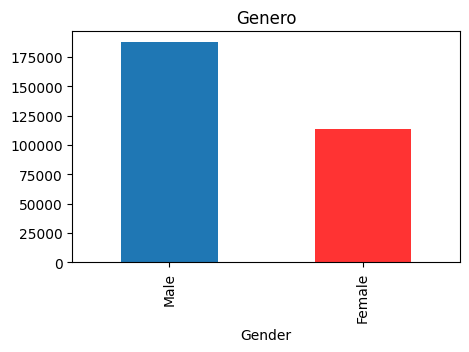

In [16]:
#Analisando varáveis Genero
plt.figure(figsize=(5, 3))
base.Gender.value_counts().plot(kind='bar', title='Genero',color = ['#1F77B4', '#FF3333']);

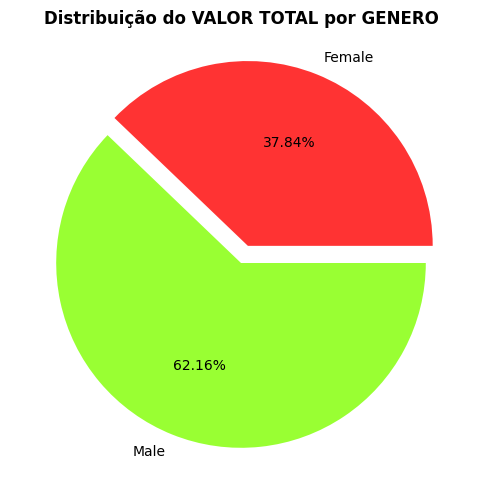

In [17]:
#Analisando Genero
color = ['#FF3333', '#99FF33']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
base.groupby('Gender')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do VALOR TOTAL por GENERO' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

#### Seguimentação por Idade

- Identificamos que a maioria dos clientes tem mais de 40 anos seguido por 20 a 24 anos e com isso podemos indicar um trabalho de marketing para difundir as vendas principalmente para pessoas de 30 e 34 anos, pois são pessoas economicamente ativas e que são um publico em ascenção.

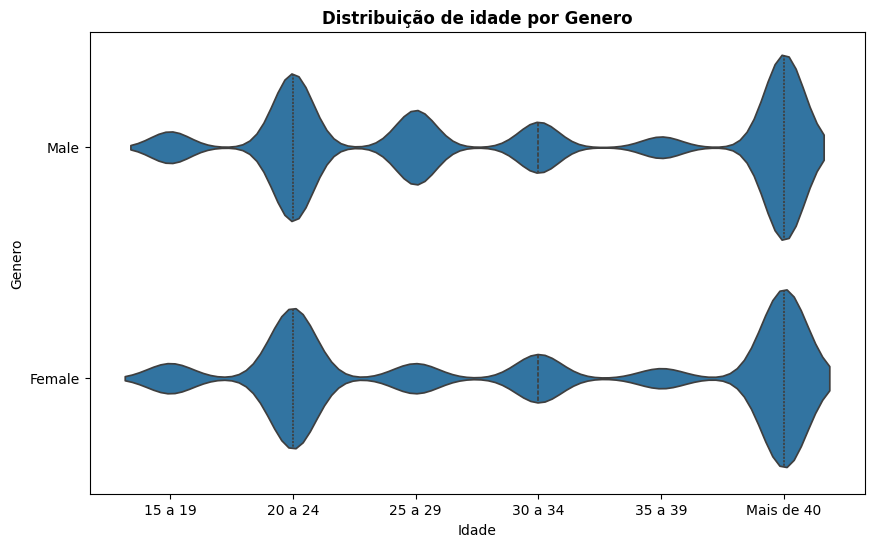

In [26]:
#Distribuição de Idade por Gênero
plt.figure(figsize=(10, 6))
sns.violinplot(data=base, x='Age', y='Gender', orient='h', inner='quart')
plt.title('Distribuição de idade por Genero', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Genero')
plt.show()

### Seguimentação por Renda

O e-commerce seguimenta seu público por renda:

- High
- Low 
- Medium

O maior publico é de categoria média com 43,20 %, nesse caso poderiamos sugerir uma estratégia para atigir principalmente o público de porte mais alto que atualmente atinge apenas 24,82 %

In [ ]:
#Analisando varáveis Renda
base.groupby(['Income']).size()

Income
High       75139
Low        96145
Medium    130077
dtype: int64

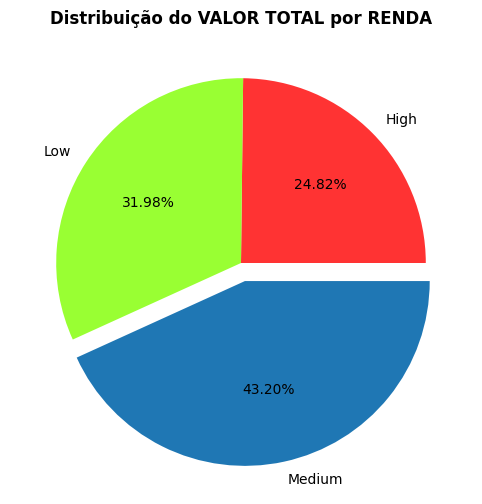

In [ ]:
#Analisando varáveis Renda
color = ['#FF3333', '#99FF33', '#1F77B4']
explode = (0, 0, 0.1)

plt.figure(figsize=(10, 6))
base.groupby('Income')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do VALOR TOTAL por RENDA' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Analisando de País

O e-commerce atende 5 paises

- USA
- UK
- Germany
- Autralia
- Canada

Dessa forma podemos identificar o comportamento e segmentação de cliente em cada país.

Podemos ver que USA e UK atinge mais de 50% das vendas, pode ser feito uma ação para melhorar as vendas nos países como UK e Germany para alcançar novos clientes.

30% das vendas estão na Australia e Canadã.

In [ ]:
#Analisando varáveis País
base.groupby(['Country']).size()

Country
Australia    45271
Canada       45240
Germany      52770
UK           62996
USA          95103
dtype: int64

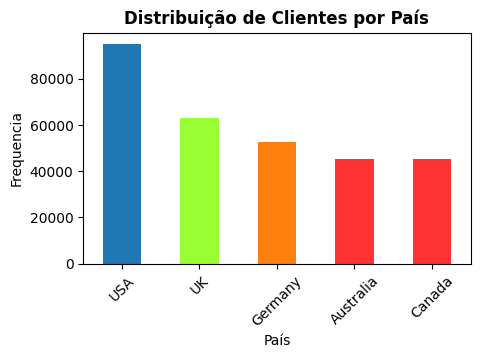

In [ ]:
#Analisando varáveis País
plt.figure(figsize=(5, 3))
base['Country'].value_counts().sort_values(ascending=False).plot(kind='bar', color = ['#1F77B4', '#99FF33', '#FF7F0E', '#FF3333', '#FF3333'])
plt.title('Distribuição de Clientes por País', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Frequencia')
plt.xticks(rotation=45)
plt.show()

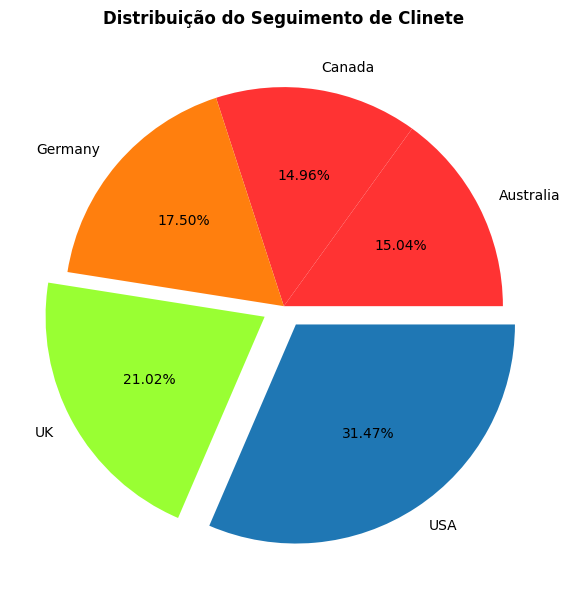

In [ ]:
#Analisando varáveis Segmineto de Clinete
color = ['#FF3333', '#FF3333', '#FF7F0E', '#99FF33', '#1F77B4']
explode = (0, 0, 0, 0.1, 0.1)

plt.figure(figsize=(10, 6))
base.groupby('Country')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do Seguimento de Clinete' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Analisando varáveis Segmineto de Clinete

- New
- Premium
- Regular

Poderia fazer um trabalho de Marketing para os clientes Regular e New se tornar Premium

In [ ]:
#Analisando varáveis Segmineto de Clinete
base.groupby(['Customer_Segment']).size()

Customer_Segment
New         91070
Premium     64317
Regular    146049
dtype: int64

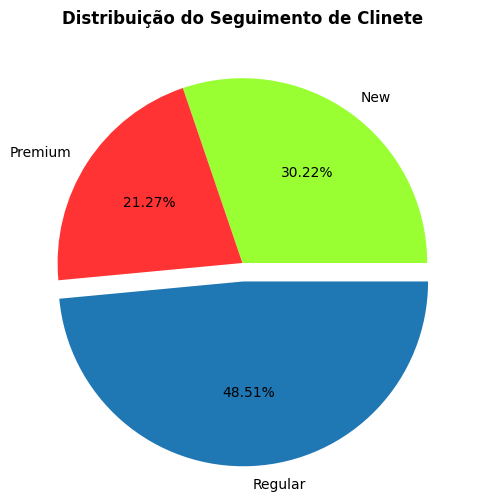

In [ ]:
#Analisando varáveis Segmineto de Clinete
color = ['#99FF33', '#FF3333', '#1F77B4']
explode = (0, 0, 0.1)

plt.figure(figsize=(10, 6))
base.groupby('Customer_Segment')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do Seguimento de Clinete' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Periodo da Vendas

Podemos identificar que a Base de dados é de um periodo que abrange dois anos 2023 e 2024

In [ ]:
# Avaliar o período dos dados coletados
inicio = pd.to_datetime(base['Date']).dt.date.min()
fim = pd.to_datetime(base['Date']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2023-03-01 Até: 2024-02-29


In [ ]:
#Analisando varáveis Ano
base.groupby(['Year']).size()

Year
2023.00    251550
2024.00     49751
dtype: int64

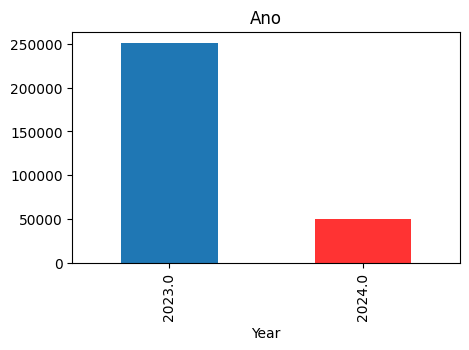

In [ ]:
#Analisando varáveis Ano
plt.figure(figsize=(5, 3))
base.Year.value_counts().plot(kind='bar', title='Ano',color = ['#1F77B4', '#FF3333']);

### Analisando a variável Mês (Month) e Ano (Year)

- Com o agrupamento podemos ver quantas transações tivemos no mês e em seguida apresentamos num gráfico de barra por ordem cronológica, uma vez que a base vai de Fevereiro de 2023 a Março de 2024

- Os meses que mais tiveram vendas foram Abril, Agosto e Dezembro, seguido por Julho e Maio

In [ ]:
#Analisando varáveis Mês
#Com o agrupamento podemos ver quantas transações tivemos no mês
base1 = pd.DataFrame(base.groupby(['Month']).size())
base1

,0
Month,
March,19119
April,41243
May,28298
June,18362
July,30853
August,32974
September,18630
October,19101
November,18399


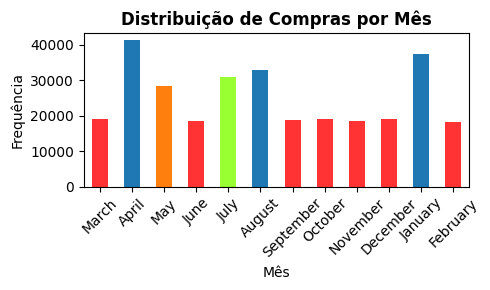

In [ ]:
# Definindo a ordem dos meses
month_order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', ]

# Convertendo a coluna 'Month' para tipo categórico com a ordem especificada
base['Month'] = pd.Categorical(base['Month'], categories=month_order, ordered=True)

# Contando os valores e ordenando-os pela ordem dos meses
month_counts = base['Month'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(5, 3))
month_counts.plot(kind='bar', color = ['#FF3333', '#1F77B4', '#FF7F0E', '#FF3333', '#99FF33', '#1F77B4', '#FF3333', '#FF3333', '#FF3333', '#FF3333', '#1F77B4'])

plt.title('Distribuição de Compras por Mês', fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### Analisando varáveis Total de Produtos por Transação

Podemos identificar que mais de 30 mil pessoas comprarm de 1 a 5 itens por transação. E o maximo de itens vendidos por transação é 10 unidades.

In [ ]:
#Analisando varáveis Total de Produtos por Transação
base.groupby(['Total_Purchases']).size()

Total_Purchases
1.00     31833
2.00     31876
3.00     31833
4.00     31535
5.00     31881
6.00     28507
7.00     28412
8.00     28673
9.00     28423
10.00    28317
dtype: int64

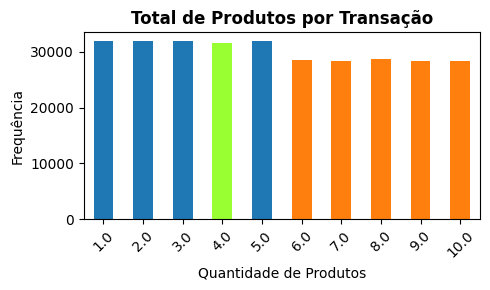

In [ ]:
# Definindo a ordem dos Total_Purchases
quat_prod = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# Convertendo a coluna 'Total_Purchases' para tipo categórico com a ordem especificada
base['Total_Purchases'] = pd.Categorical(base['Total_Purchases'], categories=quat_prod, ordered=True)

# Contando os valores e ordenando-os pela ordem de quantidade de produto
Total_Purchases = base['Total_Purchases'].value_counts().sort_index()
# Contando os valores e ordenando-os pela ordem quantidade de itens
prod_counts = base['Total_Purchases'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(5, 3))
prod_counts.plot(kind='bar', color = ['#1F77B4', '#1F77B4', '#1F77B4', '#99FF33', '#1F77B4', '#FF7F0E', '#FF7F0E', '#FF7F0E', '#FF7F0E', '#FF7F0E', '#FF7F0E'])
plt.title('Total de Produtos por Transação', fontweight='bold')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### Avaliando Feedback

Podemos identificar que o relacionamento entre clientes e e-commerce é satisfatório, pois os clienets na sua grande maioria faz um Feedback: Excellent e Good.

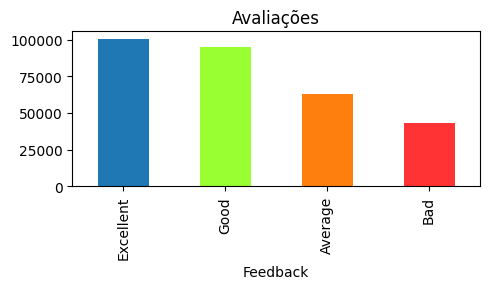

In [ ]:
# Avaliando os Feddbacks dos clientes
plt.figure(figsize=(5, 3))
base.Feedback.value_counts().plot(kind='bar', title='Avaliações',color = ['#1F77B4', '#99FF33', '#FF7F0E', '#FF3333']);

O grafico abaixo representa a porcentagem das avaliações:
- Excellent 32,32%
- Good 31,45%
- Average 20,85%
- Bad 14,38%

Isso dignifica que 63,77% dos clienets estão muito <br>satisfeitos com o que compram.<br>

Porém 20,85% ainda não estão totalmente satisfeitos<br>
E o 14,38 % não estão satisfeitos<br>
Ambos somam 35,23% é uma numero que precisa ser melhorado

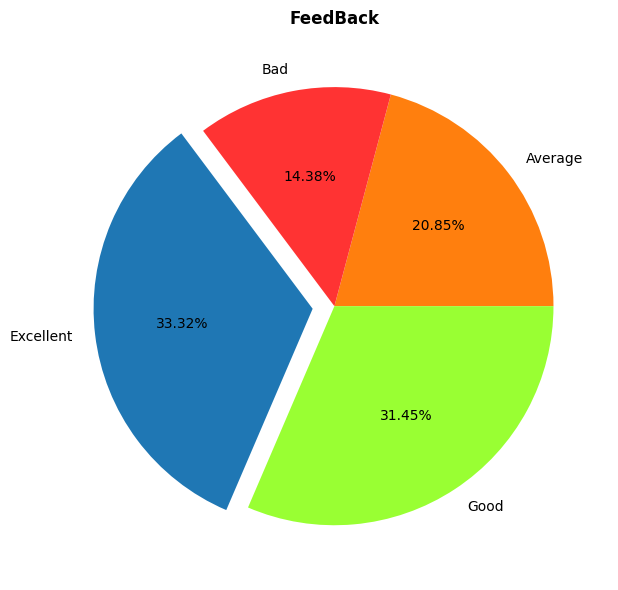

In [ ]:
#Analisando FeedBack
color = ['#FF7F0E', '#FF3333', '#1F77B4', '#99FF33']
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(10, 6))
base.groupby('Feedback')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('FeedBack' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()